#1

In [1]:
from functions import *

#2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from random import random
import time as time
import pandas as pd
platform = plt.imread('platform1.png')

#3

In [3]:
def get_field(ped_list):
    potentials = []
    ped_list_array = np.array(ped_list)
    for pedest in range(len(ped_list)):
        if all(i <= 20 for i in ped_list_array[:,1,0]):
            M = np.zeros([21,120]) #new grid size
            M[0,:] = -1 #boundaries
            M[-1,:] = -1
            M[:,0] = -1
            M[:,-1] = -1
            M[7,51:82] = 1 #bench coords
            M[10,98:105] = 1
            M[15,51:82] = 1
            M[12,98:105] = 1
            M[8:15,51:82] = -1
            M[11,98:105] = -1
            M[ped_list_array[:,1, 0], ped_list_array[:,1, 1]] = -1
            M[ped_list_array[pedest,1, 0], ped_list_array[pedest,1, 1]] = 0
            M[ped_list_array[pedest,0, 0], ped_list_array[pedest,0, 1]] = 5 #goals, the value 5 is arbitrary
            potentials.append(laplace_solve(M))
        elif not all(i <= 20 for i in ped_list_array[:,1,0]):
            M = np.zeros([21,120]) #new grid size
            M[0,:] = -1 #boundaries
            M[-1,:] = -1
            M[:,0] = -1
            M[:,-1] = -1
            M[7,51:82] = 1 #bench coords
            M[10,98:105] = 1
            M[15,51:82] = 1
            M[12,98:105] = 1
            M[8:15,51:82] = -1
            M[11,98:105] = -1
            M[ped_list_array[pedest,0, 0], ped_list_array[pedest,0, 1]] = 5 #goals, the value 5 is arbitrary
            potentials.append(laplace_solve(M))            
    return potentials

#4

In [4]:
def move_ped(ped_list, ped_ID, decided_square):
    x = ped_list[ped_ID][1][0]
    y = ped_list[ped_ID][1][1]
    
#move pedestrian sideways    
    if (((decided_square == 2) or (decided_square == 5) or (decided_square == 8)) and (x < 120)):
        ped_list[ped_ID][1][0] += 1
    elif (((decided_square == 0) or (decided_square == 3) or (decided_square == 6)) and (x > 0)):
        ped_list[ped_ID][1][0] -= 1
    elif x >= 120:
        ped_list[ped_ID][1][0] -= 1
    elif x <= 0:
        ped_list[ped_ID][1][0] += 1
        
#move pedestrian up and down
    if (((decided_square == 0) or (decided_square == 1) or (decided_square == 2)) and (y > 0 )):
        ped_list[ped_ID][1][1] -= 1
    elif (((decided_square == 6) or (decided_square == 7) or (decided_square == 8)) and (y < 20)):
        ped_list[ped_ID][1][1] += 1
    elif y >= 20:
        ped_list[ped_ID][1][1] -= 1
    elif y <= 0:
        ped_list[ped_ID][1][1] += 1
    #if (ped_list[ped_ID][1][0] in range(51,82)) and (ped_list[ped_ID][1][1] in range(51,82))
    return ped_list

#5

In [5]:
def get_prob(ped_list, ped_ID, field_list):
    # Get the specific distribution map
    mp = field_list[ped_ID]
    # Get current Square:
    x = ped_list[ped_ID][1][0]
    y = ped_list[ped_ID][1][1]
    try:
        tot = (np.exp(mp[y+1][x-1]) + np.exp(mp[y+1][x])
               + 1*np.exp(mp[y+1][x+1]) + np.exp(mp[y][x-1]) + np.exp(mp[y][x])
               + 4*np.exp(mp[y][x+1]) + np.exp(mp[y-1][x-1]) + np.exp(mp[y-1][x])
               + np.exp(mp[y-1][x+1]))
        squares = []
        for a in range(-1, 2):
            for b in range(-1, 2):
                if (b==1) and (a ==0):
                    # Will have to be changed to the exponential method mentioned by Corbetta
                    squares.append((4*np.exp(mp[y+a][x+b]))/tot)
                elif (b==1) and (a==1):
                    squares.append((1*np.exp(mp[y+a][x+b]))/tot)
                else:
                    squares.append((np.exp(mp[y+a][x+b]))/tot)
    except:
        squares = [0,1,0,0,0,0,0,0,0]
    return squares

#6

In [6]:
# Code should run for how many loops:
run_time = 360
# Between how many ped should be added per timestamp
ped_add_min = 0.1
ped_add_max = 0.5

#7

In [7]:
ped_list = []
plotting_list = []
c = 0
df = pd.DataFrame(columns = ['timestamp', 'ped', 'x', 'y'])

#8

In [8]:
for t in range(0, run_time):
    ped_list, c = generate_ped(c, ped_list, ped_add_min, ped_add_max)
    if t == 0:
        first = ped_list.copy()
    if t == int(run_time/2):
        half_way = ped_list.copy()
    field_list = get_field(ped_list)
    for ped in range(0, len(ped_list)):
        df = df.append({'timestamp' : t, 'ped': ped, 'x' : ped_list[ped][1][0], 'y' : ped_list[ped][1][1]}, ignore_index=True)
        probabilities = get_prob(ped_list, ped, field_list)
        decided_square = make_decision(probabilities)
        move_ped(ped_list, ped, decided_square)
    print(ped_list)
    print(c)  

[]
0.1560320634213368
[]
0.5855434126470039
[[[10, 118], [1, 9]]]
0
[[[10, 118], [0, 10]]]
0.37960603990554953
[[[10, 118], [1, 10]]]
0.8431469358274297
[[[10, 118], [2, 10]], [[4, 19], [1, 8]]]
0
[[[10, 118], [2, 11]], [[4, 19], [2, 8]]]
0.3651686164544089
[[[10, 118], [3, 11]], [[4, 19], [2, 9]]]
0.8336218026330366
[[[10, 118], [4, 11]], [[4, 19], [3, 9]], [[9, 89], [11, 6]]]
0
[[[10, 118], [3, 11]], [[4, 19], [3, 8]], [[9, 89], [12, 5]]]
0.4589480024775626
[[[10, 118], [4, 10]], [[4, 19], [4, 8]], [[9, 89], [13, 5]]]
0.8130463696245743
[[[10, 118], [5, 10]], [[4, 19], [4, 9]], [[9, 89], [12, 5]], [[1, 27], [8, 16]]]
0
[[[10, 118], [6, 9]], [[4, 19], [5, 9]], [[9, 89], [13, 5]], [[1, 27], [8, 15]]]
0.17862139928028126
[[[10, 118], [5, 9]], [[4, 19], [4, 9]], [[9, 89], [14, 5]], [[1, 27], [9, 15]]]
0.6345758114575064
[[[10, 118], [4, 8]], [[4, 19], [5, 9]], [[9, 89], [15, 5]], [[1, 27], [9, 14]], [[2, 3], [9, 16]]]
0
[[[10, 118], [4, 7]], [[4, 19], [4, 10]], [[9, 89], [14, 6]], [[1, 2

In [12]:
array_halfway = np.array(half_way)
array_end = np.array(ped_list)
unique_ped = np.unique(df.ped)
unique_ped

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86,
       87, 88], dtype=object)

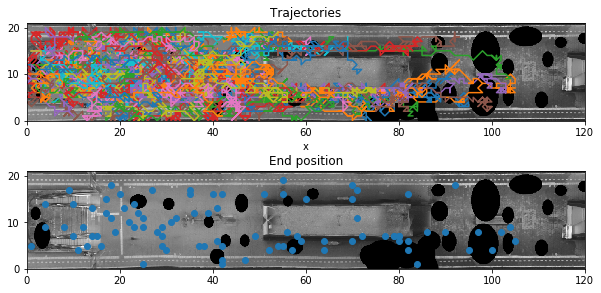

In [13]:
# plot a fugure:
#fig = plt.figure(figsize = (20,10))
#plot axes
#ax  = fig.add_subplot(111)
platform = plt.imread('platform1.png')
fig, ax = plt.subplots(2, figsize = (10,5))
ax[0].imshow(platform, extent=[0,120, 0,21])
for i in unique_ped:
    df.query('ped == @i').plot('x', 'y', ax=ax[0])
ax[0].get_legend().remove()
ax[0].set_title('Trajectories')
ax[1].imshow(platform, extent=[0,120, 0,21])
ax[1].set_title('End position')
ax[1].scatter(x=array_end[:,1,0], y=array_end[:,1,1])
plt.subplots_adjust(wspace=0, hspace=0.2)

In [ ]:
get_prob(ped_list,3,field_list)

In [ ]:
np.random.choice(np.arange(0,9),p=get_prob(ped_list,7,field_list))

In [ ]:
def move_pede(ped_list, ped_ID, decided_square):
#move pedestrian sideways
    if (ped_list[ped_ID][1][0] > 0) and (ped_list[ped_ID][1][0] < 120):
        if ((decided_square == 2) or (decided_square == 5) or (decided_square == 8)):
            ped_list[ped_ID][1][0] += 1
        elif ((decided_square == 0) or (decided_square == 3) or (decided_square == 6)):
            ped_list[ped_ID][1][0] -= 1
    elif (ped_list[ped_ID][1][0] <= -1):
        ped_list[ped_ID][1][0] += 1
    elif (ped_list[ped_ID][1][0] >= 120):
        ped_list[ped_ID][1][0] -= 1
        
    
#move pedestrian up and down
    if (ped_list[ped_ID][1][1] > 0) and (ped_list[ped_ID][1][1] < 20):
        if ((decided_square == 0) or (decided_square == 1) or (decided_square == 2)):
            ped_list[ped_ID][1][1] -= 1
        elif ((decided_square == 6) or (decided_square == 7) or (decided_square == 8)):
            ped_list[ped_ID][1][1] += 1
    elif (ped_list[ped_ID][1][1] <= -1):
        ped_list[ped_ID][1][1] += 1
    elif (ped_list[ped_ID][1][1] >= 20):
        ped_list[ped_ID][1][1] -= 1
    return ped_list

In [ ]:
not all(i <= 20 for i in ped_list_array[:,1,0])

In [ ]:
ped_list_array = np.array(ped_list)
ped_list_array

In [ ]:
np.sum(get_prob(ped_list,3,field_list))

In [ ]:
fig, ax = plt.subplots(1, figsize = (10,10))
platform = plt.imread('platform1.png')

#array_first = np.array(first)
array_halfway = np.array(half_way)
array_end = np.array(ped_list)

#ax[0].imshow(platform, extent=[0,120, 0,21])
#ax[0].set_title('start')
#ax[0].scatter(x=array_first[:,1,1], y=array_first[:,1,0])

#ax[0].imshow(platform, extent=[0,120, 0,21])
#ax[0].set_title('halfway')
#ax[0].scatter(x=array_halfway[:,1,0], y=array_halfway[:,1,1])

ax.imshow(platform, extent=[0,120, 0,21])
ax.set_title('End position')
ax.scatter(x=array_end[:,1,0], y=array_end[:,1,1])

#ax[2].imshow(platform, extent=[0,120, 0,21])
#ax[2].set_title('goal')
#ax[2].scatter(x=array_end[:,0,1], y=array_end[:,0,0])

In [ ]:
np.random.multinomial(np.arange(0,9),probs)

In [ ]:
np.arange(0,8)

In [ ]:
for t in range(0, 100):
    ped_list = generate_ped(ped_list, 1, 10)

In [ ]:
ped_list = np.array(ped_list)


In [ ]:
np.array(ped_list)[:,1]

In [ ]:
a[0][0]

In [ ]:
plt.imshow(field_list[0]);

In [ ]:
randoms = np.rint(121*np.log(1+np.random.exponential(size = (10000),scale = 1))/randoms.max())

In [ ]:
randoms = np.array([np.random.exponential(scale = 0.1) for x in range(1000)])

In [ ]:
plt.hist(randoms,bins = 121);

In [ ]:
randoms = randoms*121 /randoms.max()

In [ ]:
plt.hist(randoms.round(),bins = 121)

In [ ]:
while True:
    number = np.random.exponential(scale = 1)
    if number <= 1:
        number = int(np.rint(118*number))
        break
    else:
        pass

In [ ]:
number

In [ ]:
ped_list[:,1]

In [ ]:
ped_list

In [ ]:
ped_array = [[np.random.randint(0,21), np.random.randint(0,120)] for x in range(10)]

In [ ]:
ped_array

In [ ]:
np.random.randint(size = 10)

In [ ]:
ped_array

In [ ]:
m = np.zeros((10,10))

In [ ]:
m[:,0] = -1
m[:,-1] = -1
m[0,:] = -1
m[-1,:] = -1
m[3,7] = 5

In [ ]:
m

In [ ]:
plt.imshow(m)

In [ ]:
@jit(nopython = True)
def laplace_solve(M):
    for n in range(50):
        for j in range(len(M[0,:])-1):
            for i in range(len(M[:,0])-1):
                if M[i][j] != 1:
                    if M[i][j] != -1:
                        if M[i][j] != 5:
                            M[i,j] = 1/4 * (M[i-1][j] + M[i+1][j] + M[i][j-1] + M[i][j+1])
                else:
                    pass
    return M

In [ ]:
plt.imshow(laplace_solve(m))

In [ ]:
ped_list

In [ ]:
def get_field(ped_list):
    potentials = []
    ped_list_array = np.array(ped_list)
    for pedest in range(len(ped_list)):
        M = np.zeros([21,120]) #new grid size
        M[0,:] = -1 #boundaries
        M[-1,:] = -1
        M[:,0] = -1
        M[:,-1] = -1
        M[7,51:82] = 1 #bench coords
        M[10,98:105] = 1
        M[15,51:82] = 1
        M[12,98:105] = 1
        M[ped_list_array[:,1, 0], ped_list_array[:,1, 1]] = -1
        M[ped_list_array[pedest,1, 0], ped_list_array[pedest,1, 1]] = 0
        M[ped_list_array[pedest,0, 0], ped_list_array[pedest,0, 1]] = 5 #goals, the value 5 is arbitrary
        potentials.append(laplace_solve(M))
    return potentials

In [ ]:
plt.imshow(get_field(ped_list)[5])

In [ ]:
get_field(ped_list)[0][0]

In [ ]:
len(ped_list)